# Previsão de empréstimo com base no comportamento do cliente usando Árvore de decisão

![](https://xerpay.com.br/blog/wp-content/uploads/sites/2/2020/04/cuidados-ao-fazer-empréstimo-1536x1153.jpg)

Link: https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior?select=Sample+Prediction+Dataset.csv

# IMPORTANDO FERRAMENTAS INICIAIS

In [56]:
from __future__ import print_function
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# CARREGANDO DADOS

In [24]:
train_data = pd.read_csv(r'C:\Users\Polho\Documents\Python\datasets\Previsão de empréstimo com base no comportamento do cliente\Training Data.csv')

In [25]:
train_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


# RELAÇÃO EMPRÉSTIMO COM IDADE

<AxesSubplot:xlabel='Age', ylabel='Risk_Flag'>

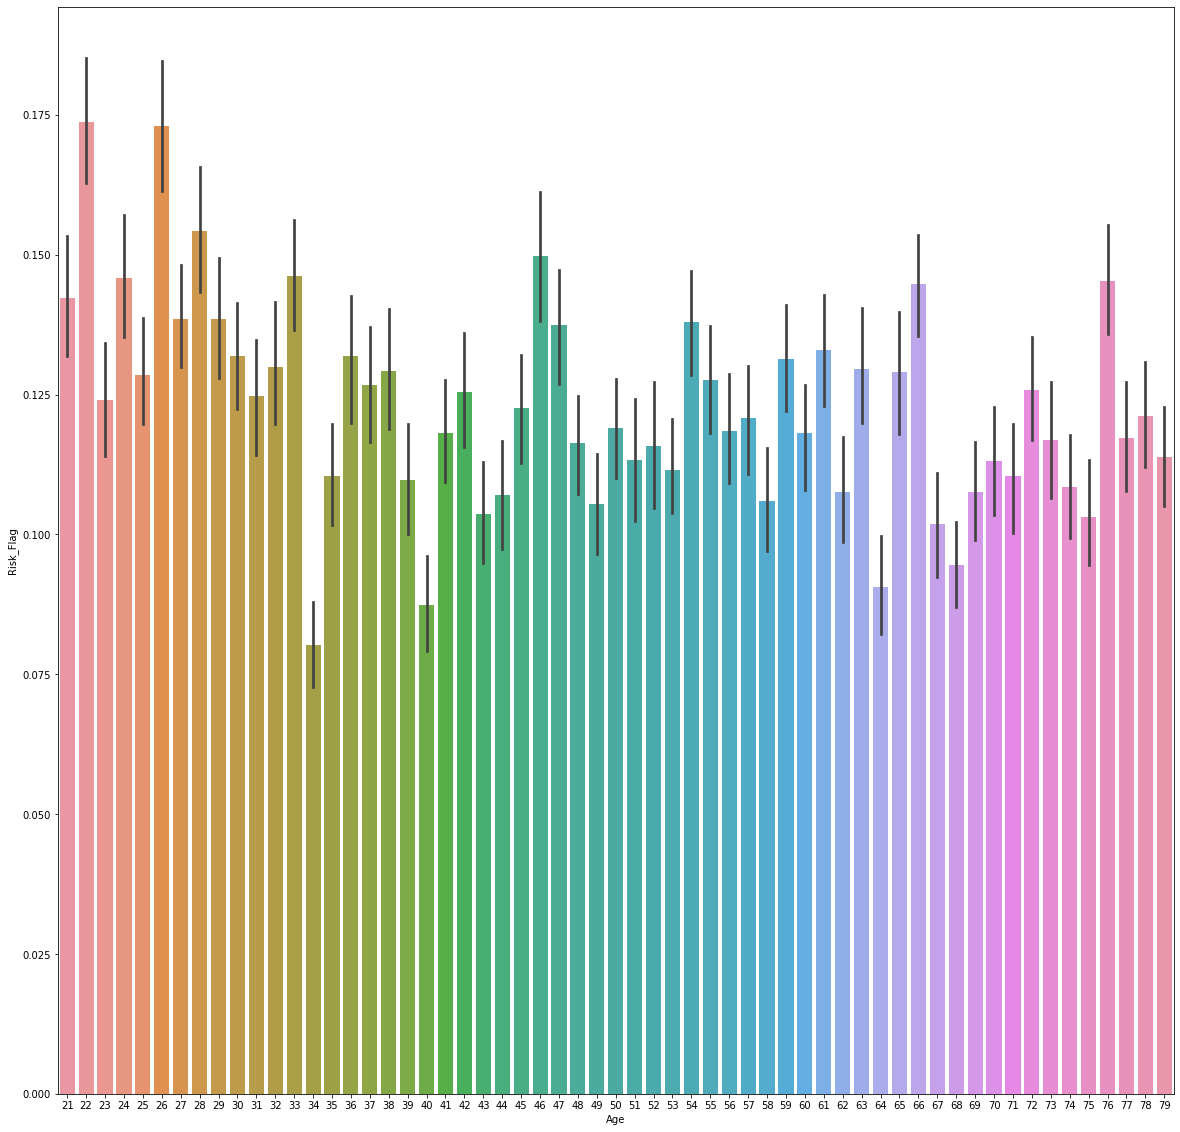

In [27]:
plt.figure(figsize=(20,20))
sns.barplot(data=train_data, x='Age', y='Risk_Flag')

# LIMPEZA DOS DADOS

In [28]:
train_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [29]:
labels_serie = 0
labels = 0
labels, _ = pd.factorize(train_data['Married/Single'])
labels_serie = pd.Series(labels)
train_data['Married/Single'] = labels_serie

In [30]:
labels_serie = 0
labels = 0
labels, _ = pd.factorize(train_data['House_Ownership'])
labels_serie = pd.Series(labels)
train_data['House_Ownership'] = labels_serie

In [31]:
labels_serie = 0
labels = 0
labels, _ = pd.factorize(train_data['Car_Ownership'])
labels_serie = pd.Series(labels)
train_data['Car_Ownership'] = labels_serie

In [32]:
train_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,0,0,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,0,0,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,1,0,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,0,0,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,0,0,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [33]:
train_data = pd.get_dummies(train_data, columns=['Profession', 'CITY', 'STATE'])

In [34]:
train_data = train_data.drop(['Id'], axis=1)

In [35]:
train_data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Air_traffic_controller,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,1303834,23,3,0,0,0,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,0,0,0,9,13,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,1,0,0,4,10,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,0,0,1,2,12,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,0,0,0,3,14,1,0,...,0,0,0,1,0,0,0,0,0,0


# DIVIDINDO O DATASET

In [36]:
X = train_data.drop(['Risk_Flag'], axis=1)
y = train_data['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# NORMALIZANDO OS DADOS

In [37]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

# CRIANDO MODELO

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# TESTANDO O MODELO

In [41]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
print(f'Acurácia do modelo: {accuracy_score(y_pred, y_test):.2f}%')

Acurácia do modelo: 0.88%


# SALVANDO O MODELO E RE-IMPORTANDO

In [50]:
import pickle
with open ('Risk_flag_DTclassf.plk', 'wb') as file:
    pickle.dump(model, file)


In [52]:
with open ('Risk_flag_DTclassf.plk', 'rb') as file:
    model_load = pickle.load(file)

In [54]:
model_load_y_pred = model_load.predict(X_test)
print(f'Acurácia do modelo importado: {accuracy_score(model_load_y_pred, y_test):.2f}%')

Acurácia do modelo importado: 0.88%
